In [3]:
print("hello")

hello


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sns.set(style="whitegrid")

In [6]:
# Load the dataset
file_path = 'wfp_market_food_prices.csv'  # Replace with your file path
try:
    food_prices_df = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 encoding doesn't work, try with 'utf-8' or 'ISO-8859-1'
    food_prices_df = pd.read_csv(file_path, encoding='utf-8')

In [7]:
print(food_prices_df.head())

   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commoditysource  
0  

In [8]:
print(food_prices_df.tail())

        adm0_id    adm0_name  adm1_id          adm1_name  mkt_id mkt_name  \
743909    70001  South Sudan     2750  Eastern Equatoria    1786    Torit   
743910    70001  South Sudan     2750  Eastern Equatoria    1786    Torit   
743911    70001  South Sudan     2750  Eastern Equatoria    1786    Torit   
743912    70001  South Sudan     2750  Eastern Equatoria    1786    Torit   
743913    70001  South Sudan     2750  Eastern Equatoria    1786    Torit   

        cm_id                 cm_name  cur_id cur_name  pt_id pt_name  um_id  \
743909    156                  Sesame      83      SSP     15  Retail     47   
743910    284           Fuel (diesel)      83      SSP     15  Retail     15   
743911    284           Fuel (diesel)      83      SSP     15  Retail     15   
743912    285  Fuel (petrol-gasoline)      83      SSP     15  Retail     15   
743913    285  Fuel (petrol-gasoline)      83      SSP     15  Retail     15   

       um_name  mp_month  mp_year  mp_price mp_commodity

In [9]:
print(food_prices_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm0_name           743914 non-null  object 
 2   adm1_id             743914 non-null  int64  
 3   adm1_name           729965 non-null  object 
 4   mkt_id              743914 non-null  int64  
 5   mkt_name            743914 non-null  object 
 6   cm_id               743914 non-null  int64  
 7   cm_name             743914 non-null  object 
 8   cur_id              743914 non-null  int64  
 9   cur_name            743914 non-null  object 
 10  pt_id               743914 non-null  int64  
 11  pt_name             743914 non-null  object 
 12  um_id               743914 non-null  int64  
 13  um_name             743914 non-null  object 
 14  mp_month            743914 non-null  int64  
 15  mp_year             743914 non-nul

In [10]:
print(food_prices_df.describe())

             adm0_id        adm1_id         mkt_id          cm_id  \
count  743914.000000  743914.000000  743914.000000  743914.000000   
mean      929.754832   17779.426232     885.962341     161.130914   
std      6595.353806   81345.242217     540.492854     117.826297   
min         1.000000       0.000000      80.000000      50.000000   
25%       115.000000    1510.000000     377.000000      67.000000   
50%       170.000000    2207.000000     912.000000     110.000000   
75%       205.000000   21969.000000    1134.000000     233.000000   
max     70001.000000  900022.000000    2094.000000     490.000000   

              cur_id          pt_id          um_id       mp_month  \
count  743914.000000  743914.000000  743914.000000  743914.000000   
mean       57.325319      14.930508      10.562171       6.379772   
std        23.140366       0.277872      13.160485       3.434972   
min        22.000000      14.000000       5.000000       1.000000   
25%        30.000000      15.0000

In [11]:
print(food_prices_df.isnull().sum())

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64


In [12]:
bread_prices_afghanistan = food_prices_df[(food_prices_df['adm0_name'] == 'Afghanistan') & 
                                          (food_prices_df['cm_name'] == 'Bread')]

In [13]:
average_price_per_year = bread_prices_afghanistan.groupby('mp_year')['mp_price'].mean().reset_index()


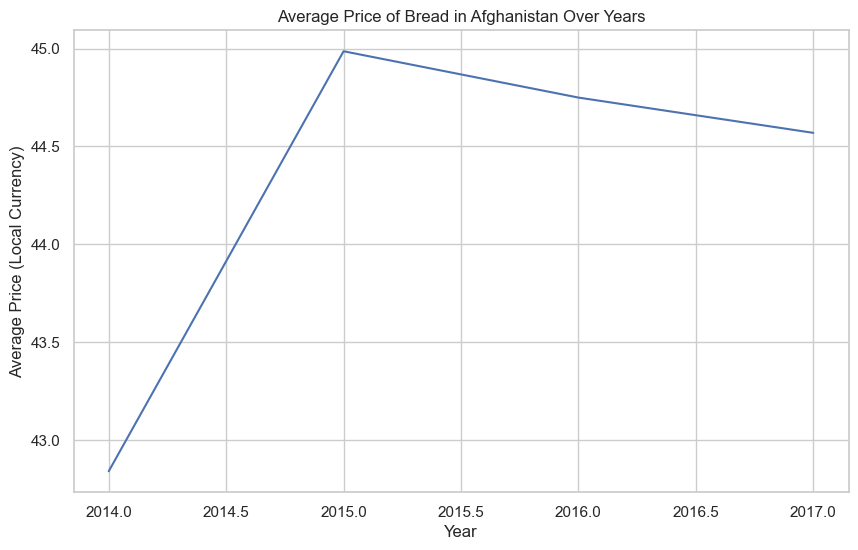

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_year, x='mp_year', y='mp_price')
plt.title('Average Price of Bread in Afghanistan Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (Local Currency)')
plt.show()

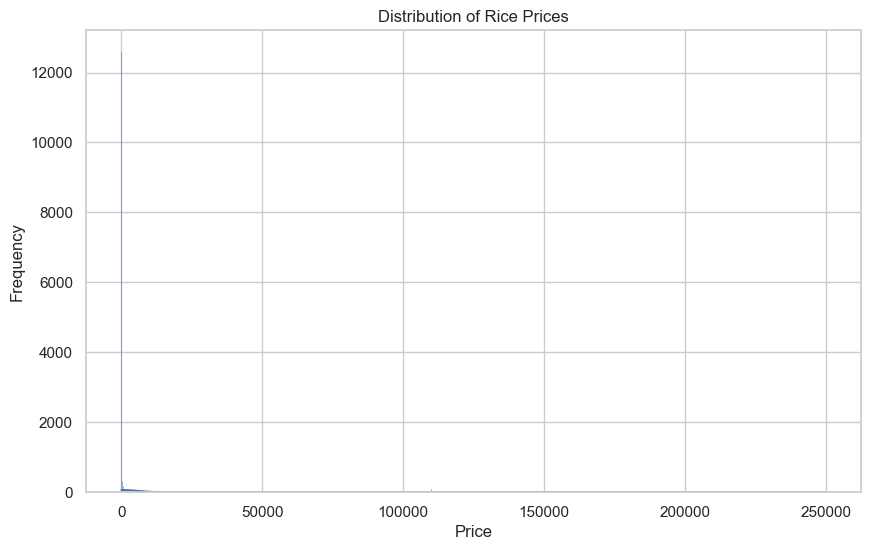

In [15]:
# Distribution of Prices for a Specific Commodity, e.g., 'Rice'
rice_prices = food_prices_df[food_prices_df['cm_name'] == 'Rice']

plt.figure(figsize=(10, 6))
sns.histplot(rice_prices['mp_price'], kde=True)
plt.title('Distribution of Rice Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


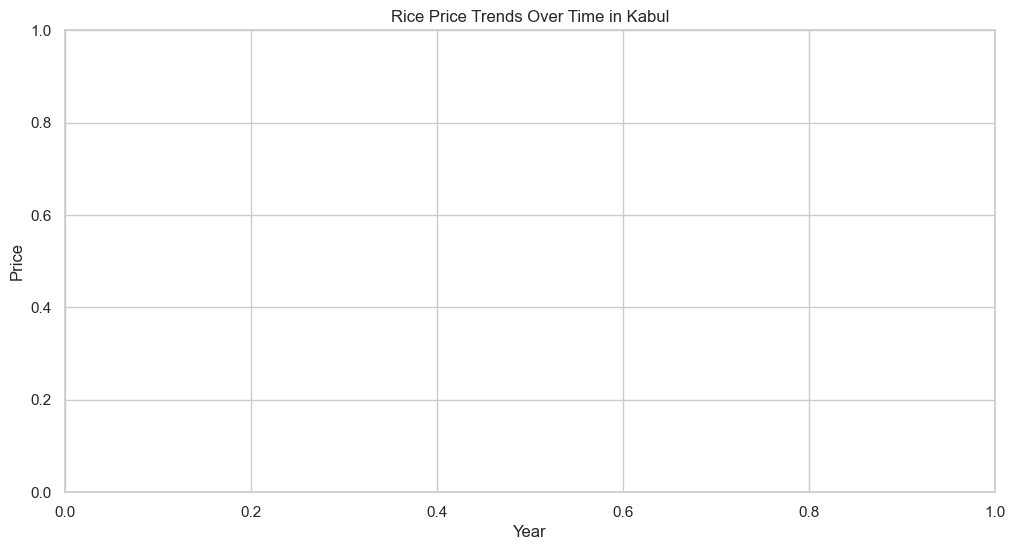

In [16]:
# Price Trends Over Time for 'Rice' in a specific market, e.g., 'Kabul'
rice_prices_kabul = food_prices_df[(food_prices_df['cm_name'] == 'Rice') & (food_prices_df['mkt_name'] == 'Kabul')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices_kabul, x='mp_year', y='mp_price', hue='um_name')
plt.title('Rice Price Trends Over Time in Kabul')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


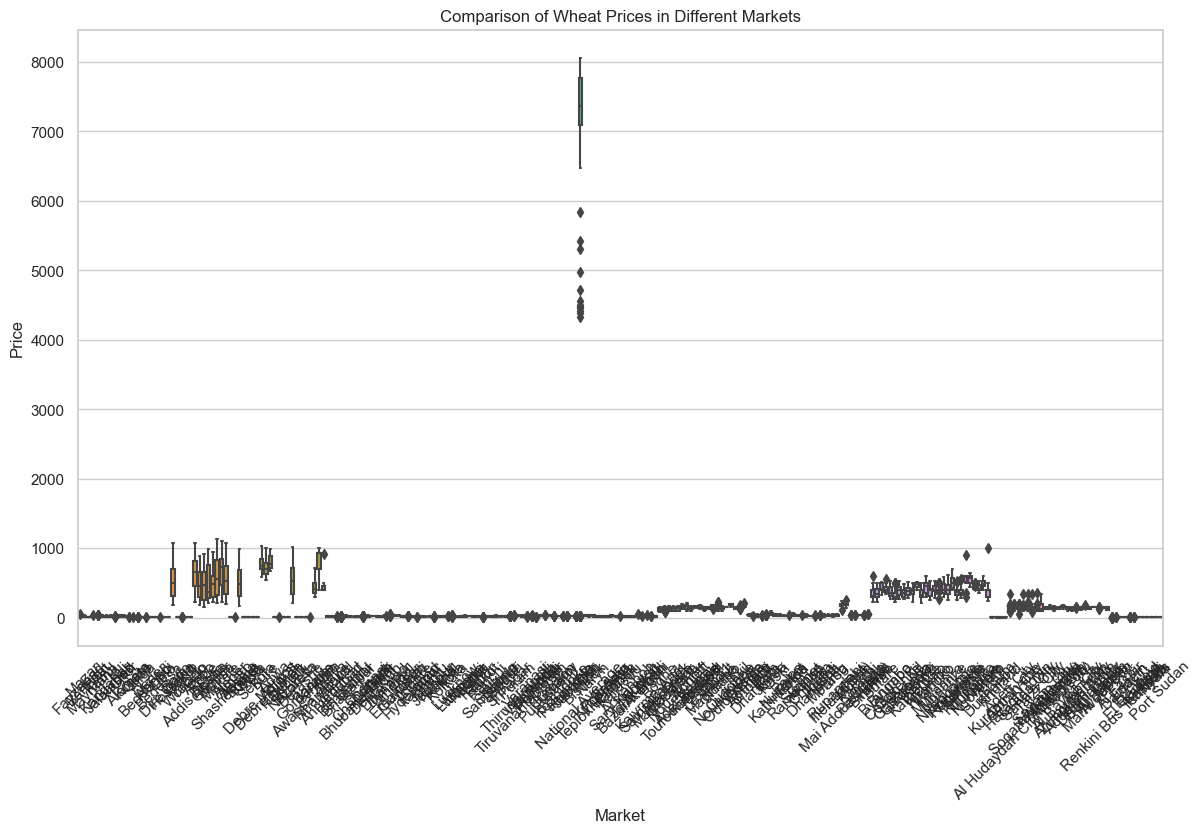

In [17]:
# Comparison of 'Wheat' Prices in Different Markets
wheat_prices = food_prices_df[food_prices_df['cm_name'] == 'Wheat']

plt.figure(figsize=(14, 8))
sns.boxplot(data=wheat_prices, x='mkt_name', y='mp_price')
plt.xticks(rotation=45)
plt.title('Comparison of Wheat Prices in Different Markets')
plt.xlabel('Market')
plt.ylabel('Price')
plt.show()


In [18]:
# Yearly Average Prices of Different Commodities in 2020
yearly_prices_2020 = food_prices_df[food_prices_df['mp_year'] == 2020]
average_prices_2020 = yearly_prices_2020.groupby('cm_name')['mp_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_prices_2020, x='mp_price', y='cm_name')
plt.title('Average Prices of Different Commodities in 2020')
plt.xlabel('Average Price')
plt.ylabel('Commodity')
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

In [19]:
# Check if the DataFrame is empty
if average_prices_2020.empty:
    print("The DataFrame 'average_prices_2020' is empty. No data to plot.")
else:
    print("The DataFrame 'average_prices_2020' contains data.")

# Inspect the first few rows of the DataFrame
print(average_prices_2020.head())

# Check data types of the columns
print(average_prices_2020.dtypes)

The DataFrame 'average_prices_2020' is empty. No data to plot.
Empty DataFrame
Columns: [cm_name, mp_price]
Index: []
cm_name      object
mp_price    float64
dtype: object


In [20]:
us_beef_prices = food_prices_df[(food_prices_df['adm0_name'] == 'United States') & 
                                (food_prices_df['cm_name'] == 'Beef')]

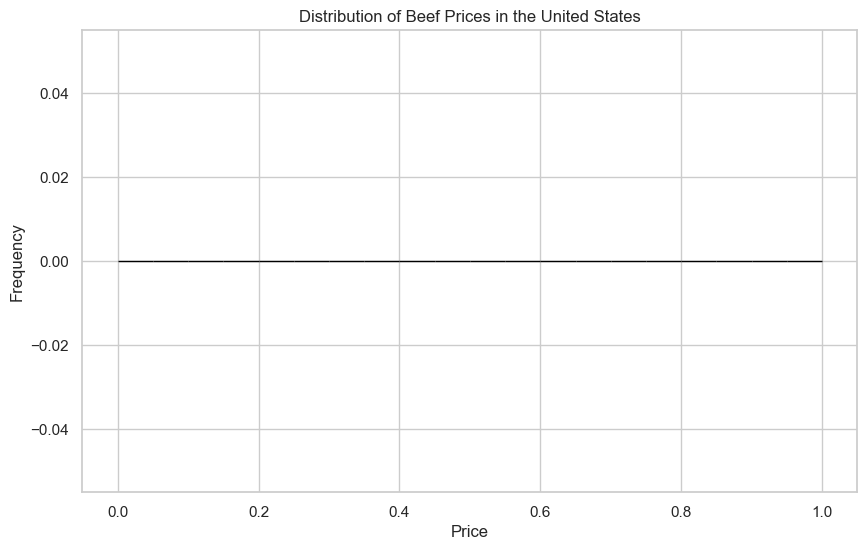

In [21]:
# Plot a histogram of beef prices
plt.figure(figsize=(10, 6))
plt.hist(us_beef_prices['mp_price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Beef Prices in the United States')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: mp_price, dtype: float64


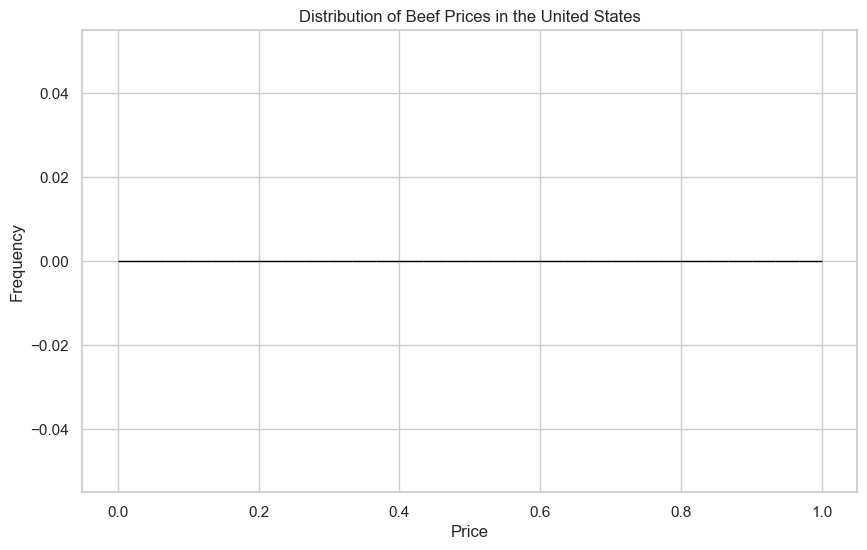

In [22]:
# Check the number of data points and basic statistics for beef prices
print(us_beef_prices['mp_price'].describe())

# If there are enough data points, try plotting again with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(us_beef_prices['mp_price'].dropna(), bins=30, color='blue', edgecolor='black')  # Adjust bins as necessary
plt.title('Distribution of Beef Prices in the United States')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [23]:
unique_commodities = food_prices_df['cm_name'].unique()

In [24]:
print(unique_commodities)

['Bread' 'Wheat' 'Rice (low quality)' 'Wage (qualified labour)'
 'Livestock (sheep, one-year-old alive female)' 'Fuel (diesel)'
 'Exchange rate' 'Wage (non-qualified labour, non-agricultural)' 'Rice'
 'Beans (white)' 'Milk' 'Potatoes' 'Eggs' 'Meat (chicken)' 'Sugar'
 'Lentils' 'Pasta' 'Tomatoes' 'Oil' 'Cheese (dry)' 'Carrots' 'Onions'
 'Bananas' 'Tea' 'Fuel (petrol-gasoline)' 'Fish (canned)' 'Apples'
 'Milk (camel)' 'Meat (camel)' 'Tea (sahm)' 'Wheat flour'
 'Oil (vegetable)' 'Rice (white)' 'Meat (pork)' 'Meat (beef)' 'Cabbage'
 'Apples (red)' 'Cucumbers (greenhouse)' 'Fuel (kerosene)' 'Fish (fresh)'
 'Bread (high grade flour)' 'Bread (first grade flour)'
 'Milk (non-pasteurized)' 'Rice (coarse)' 'Lentils (masur)' 'Oil (palm)'
 'Rice (imported)' 'Sorghum' 'Maize (white)' 'Cassava meal (gari)' 'Maize'
 'Millet' 'Rice (local)' 'Rice (imported, Indian)'
 'Meat (beef, chops with bones)' 'Meat (chicken, whole)' 'Noodles (short)'
 'Potatoes (Dutch)' 'Potatoes (Irish, imilla)' 'Rice (estaquil

In [25]:
unique_countries = food_prices_df['adm0_name'].unique()


In [26]:
print(unique_countries)

['Afghanistan' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bhutan' 'Bolivia' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Colombia' 'Congo'
 'Costa Rica' "Cote d'Ivoire" 'Democratic Republic of the Congo'
 'Djibouti' 'El Salvador' 'Ethiopia' 'Gambia' 'Georgia' 'Ghana'
 'Guatemala' 'Guinea-Bissau' 'Guinea' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iran  (Islamic Republic of)' 'Iraq' 'Jordan' 'Kenya'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Lebanon' 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique'
 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Panama' 'Peru'
 'Philippines' 'Rwanda' 'Senegal' 'Somalia' 'Sri Lanka' 'Swaziland'
 'Syrian Arab Republic' 'Tajikistan' 'Timor-Leste' 'Turkey' 'Uganda'
 'Ukraine' 'United Republic of Tanzania' 'Yemen' 'Zambia' 'Zimbabwe'
 'State of Palestine' 'Sudan' 'Egypt' 'South Sudan']


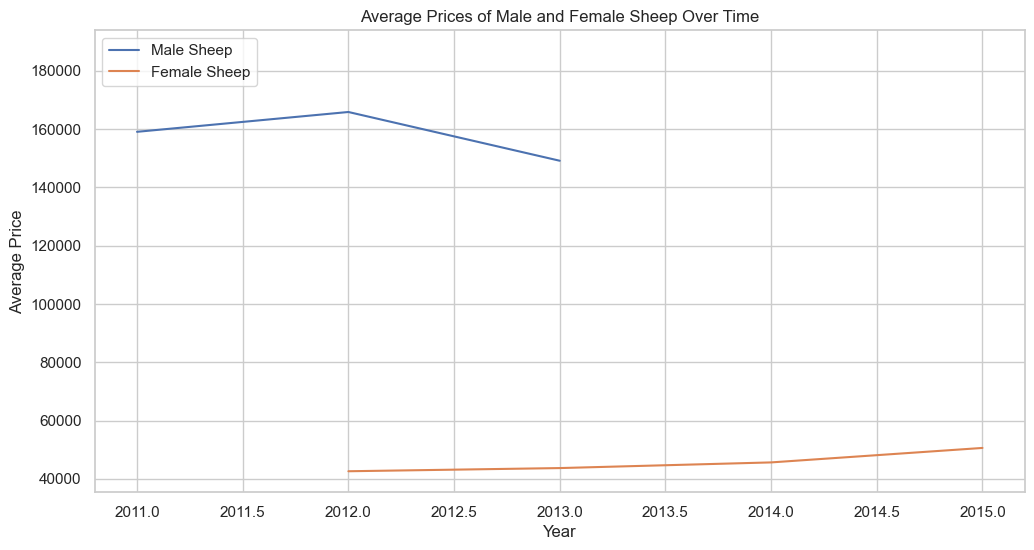

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
food_prices_df = pd.read_csv('wfp_market_food_prices.csv', encoding='latin-1')

# Filter the data for male and female sheep
male_sheep_prices = food_prices_df[food_prices_df['cm_name'] == 'Livestock (cattle)']
female_sheep_prices = food_prices_df[food_prices_df['cm_name'] == 'Livestock (pig)']

# Group by year and get the average price
average_male_sheep_price_by_year = male_sheep_prices.groupby('mp_year')['mp_price'].mean().reset_index()
average_female_sheep_price_by_year = female_sheep_prices.groupby('mp_year')['mp_price'].mean().reset_index()

# Merge the two dataframes on the year
merged_prices = pd.merge(average_male_sheep_price_by_year, average_female_sheep_price_by_year, on='mp_year', how='outer', suffixes=('_male', '_female'))

# Sort by year to make sure the data is in chronological order
merged_prices.sort_values('mp_year', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_prices['mp_year'], merged_prices['mp_price_male'], label='Male Sheep')
plt.plot(merged_prices['mp_year'], merged_prices['mp_price_female'], label='Female Sheep')
plt.title('Average Prices of Male and Female Sheep Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()
